## Load packages

In [1]:
import pandas as pd
import numpy as np
import random
import re
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy.stats import zscore



## Load and inspect data 

In [2]:
sentencing_data_cleaned = pd.read_csv("../Data/sentencing_cleaned.csv", low_memory = False)

sentencing_data_cleaned.head()
sentencing_data_cleaned.shape
sentencing_data_cleaned.info

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
2,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
3,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
4,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314


(135165, 52)

<bound method DataFrame.info of              CASE_ID  CASE_PARTICIPANT_ID          RECEIVED_DATE  \
0       149765331439         175691153649  8/15/1984 12:00:00 AM   
1       150065796098         162105612284  8/23/1984 12:00:00 AM   
2       154954734978         225758446387   6/8/2001 12:00:00 AM   
3       155222744754         217349881776  1/31/2001 12:00:00 AM   
4       155327892699         217212381455   2/6/2001 12:00:00 AM   
...              ...                  ...                    ...   
135160  445516248775         905289187184   2/3/2021 12:00:00 AM   
135161  445527409730         905322500577   2/4/2021 12:00:00 AM   
135162  445587767000         905518794790   2/9/2021 12:00:00 AM   
135163  445592613204         905533705601   2/9/2021 12:00:00 AM   
135164  445593200623         905535215556   2/9/2021 12:00:00 AM   

                                 OFFENSE_CATEGORY  PRIMARY_CHARGE_FLAG  \
0                               PROMIS Conversion                 True   
1  

## Create Term Length and Sentence Length Variables

In [3]:
## Creating Term Length Variable

## subsetting to just units of days, years, months, and life sentences (Note: we are equating one life sentence to be 100 years)

sentencing_df = sentencing_data_cleaned[sentencing_data_cleaned["COMMITMENT_UNIT"].isin(["Year(s)", "Natural Life", "Days", "Months"]) & sentencing_data_cleaned["COMMITMENT_TYPE"].isin(["Illinois Department of Corrections", "Cook County Department of Corrections"])]


sentencing_df["COMMITMENT_TYPE"].unique()
sentencing_df[["COMMITMENT_UNIT", "COMMITMENT_TERM"]][sentencing_df["COMMITMENT_TYPE"] == "Cook County Boot Camp"]




## Creating sentence length variable (in years)

sentencing_df["COMMITMENT_TERM"] = sentencing_df["COMMITMENT_TERM"].astype(float)


sentencing_df["sentence_length"] = sentencing_df.apply(lambda row: row["COMMITMENT_TERM"] if row["COMMITMENT_UNIT"] == "Year(s)" else  
                                                       row["COMMITMENT_TERM"] * 100 if row["COMMITMENT_UNIT"] == "Natural Life" else
                                                       row["COMMITMENT_TERM"] / 365 if row["COMMITMENT_UNIT"] == "Days" else 
                                                       row["COMMITMENT_TERM"] / 12 if row["COMMITMENT_UNIT"] == "Months" else None, axis = 1)


array(['Illinois Department of Corrections',
       'Cook County Department of Corrections'], dtype=object)

,COMMITMENT_UNIT,COMMITMENT_TERM


/var/folders/gq/d2mhy31n1yz2c7gxn_h174t00000gn/T/ipykernel_11545/1603542082.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentencing_df["COMMITMENT_TERM"] = sentencing_df["COMMITMENT_TERM"].astype(float)
/var/folders/gq/d2mhy31n1yz2c7gxn_h174t00000gn/T/ipykernel_11545/1603542082.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentencing_df["sentence_length"] = sentencing_df.apply(lambda row: row["COMMITMENT_TERM"] if row["COMMITMENT_UNIT"] == "Year(s)" else


## Make sentencing unit standardizable by creating Z score 

In [4]:
## Need to convert sentencing unit to something standardizable across crimes 
## To do this will use a z score (how many standard deviations something is from the mean) grouped by the exact same charge type


sentencing_df["sentence_length_zscore"] = sentencing_df.groupby("DISPOSITION_CHARGED_OFFENSE_TITLE")["sentence_length"].transform(zscore)

## looking at z score stats just quickly

np.mean(sentencing_df["sentence_length_zscore"])

## 0 z score would mean perfectly average or neutral sentence length for the crime


/var/folders/gq/d2mhy31n1yz2c7gxn_h174t00000gn/T/ipykernel_11545/4193320962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentencing_df["sentence_length_zscore"] = sentencing_df.groupby("DISPOSITION_CHARGED_OFFENSE_TITLE")["sentence_length"].transform(zscore)


4.246430721678059e-15

## Export data as csv file to Data folder 

In [14]:
sentencing_df.to_csv(r'..Data\sentencing_data_withZ.csv')

In [6]:
## Investigating which judges have the highest and lowest mean z scores 

## About 200 judges

judges = sentencing_df.groupby("SENTENCE_JUDGE")["sentence_length_zscore"].apply(np.mean).sort_values(ascending = False)

## list of top 50% and bottom 50% judges in terms of sentencing severity

max_judges = judges[:123].index

min_judges = judges[124:].index

max_subset = sentencing_df[sentencing_df["SENTENCE_JUDGE"].isin(max_judges)]

min_subset = sentencing_df[sentencing_df["SENTENCE_JUDGE"].isin(min_judges)]


min_subset.columns



Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME',
       'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_TYPE', 'CURRENT_SENTENCE_FLAG', 'COMMITMENT_TYPE',
       'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days',
       'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY',
       'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_AGENCY',
       'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE', 'FELONY_REVIEW_DATE',
       'FELONY_REVIEW_RESULT', 'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY',
       'is_changed_

False    51334
True      6430
Name: is_white_derived, dtype: int64

False    11902
True      2231
Name: is_white_derived, dtype: int64

57764

14133

SENTENCE_COURT_FACILITY
26TH Street                     0.030753
51st & Wentworth (Area 1)       0.594640
727 E. 111th Street (Area 2)   -0.701573
Belmont & Western (Area 3)     -0.450302
Bridgeview Courthouse          -0.055841
DV Courthouse                  -0.204305
Grand & Central (Area 5)       -0.477308
Harrison & Kedzie (Area 4)     -0.039666
Markham Courthouse             -0.112688
Maywood Courthouse             -0.036334
PROMIS                         -0.126594
Rolling Meadows Courthouse     -0.012579
Skokie Courthouse              -0.007978
Name: sentence_length_zscore, dtype: float64

INCIDENT_CITY
Algonquin           -0.053951
Alsip                0.050445
Arlington Heights    0.074281
Arlington Hts        0.270067
Barrington           0.546501
                       ...   
Wilmette            -0.041509
Winnetka             0.121823
Wood Dale           -0.648886
Woodstock           -0.116232
Worth               -0.248008
Name: sentence_length_zscore, Length: 195, dtype: float64

AGE_AT_INCIDENT
137.0   -0.824173
82.0    -0.805030
76.0    -0.787398
114.0   -0.710114
77.0    -0.486377
           ...   
63.0     0.151033
41.0     0.151580
60.0     0.182536
70.0     0.263063
78.0     1.400792
Name: sentence_length_zscore, Length: 68, dtype: float64

GENDER
Female                       -0.148537
Male                          0.011291
Male name, no gender given   -0.332668
Unknown                       0.225404
Unknown Gender               -0.366844
Name: sentence_length_zscore, dtype: float64

LAW_ENFORCEMENT_AGENCY
ALSIP PD                                   0.088349
AMTRAK NATIONAL RAILROAD PASSENGER CORP   -0.154000
ARLINGTON HEIGHTS PD                       0.067842
ARLINGTON HEIGHTS POLICE DEPARTMENT       -0.390060
BARRINGTON HILLS PD                       -0.164716
                                             ...   
WILLOW SPRINGS PD                         -0.290648
WILMETTE PD                               -0.036643
WILMETTE POLICE DEPARTMENT                 0.167382
WINNETKA PD                                0.041495
WORTH PD                                  -0.218557
Name: sentence_length_zscore, Length: 375, dtype: float64

/var/folders/gq/d2mhy31n1yz2c7gxn_h174t00000gn/T/ipykernel_11545/174654646.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentencing_df['ARREST_DATE'] = pd.to_datetime(sentencing_df['ARREST_DATE'])


SENTENCE_TYPE
Probation                               -0.540041
Probation Terminated Instanter          -0.475841
Jail                                    -0.280403
Inpatient Mental Health Services        -0.258566
Probation Terminated Unsatisfactorily   -0.189491
2nd Chance Probation                    -0.181474
Cook County Boot Camp                   -0.177266
Conditional Discharge                    0.012814
Prison                                   0.024475
Supervision                              0.421073
Conditional Release                      0.486818
Probation Terminated Satisfactorily      1.128597
Death                                    1.610313
Name: sentence_length_zscore, dtype: float64

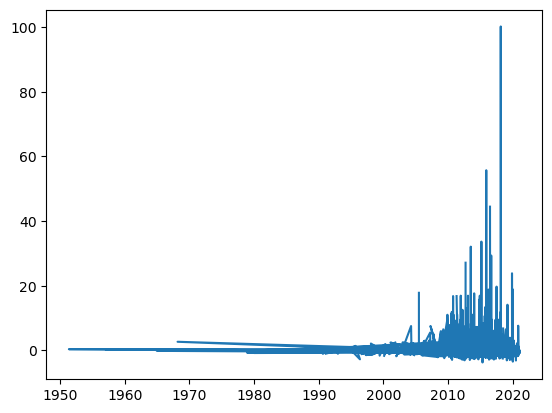

In [7]:
## Investigating what to actually try to show 

max_subset["is_white_derived"].value_counts()
min_subset["is_white_derived"].value_counts()

## Race 

## min_subset.groupby(["is_white_derived", "simplified_offense_derived"])["sentence_length_zscore"].apply(np.mean)
## max_subset.groupby(["is_white_derived", "simplified_offense_derived"])["sentence_length_zscore"].apply(np.mean)

## number of cases 

max_subset["CASE_ID"].nunique()
min_subset["CASE_ID"].nunique()


## Location 

## court location 

sentencing_df.groupby("SENTENCE_COURT_FACILITY")["sentence_length_zscore"].apply(np.mean)


## crime location 

sentencing_df.groupby("INCIDENT_CITY")["sentence_length_zscore"].apply(np.mean)


## Case Length

import matplotlib.pyplot as plt

## plt.scatter(sentencing_df["sentence_length_zscore"], sentencing_df["LENGTH_OF_CASE_in_Days"])

## doesn't' seem like it matters tbh

## Age

sentencing_df.groupby("AGE_AT_INCIDENT")["sentence_length_zscore"].apply(np.mean).sort_values()

## Gender

sentencing_df.groupby("GENDER")["sentence_length_zscore"].apply(np.mean)

## Law enforcement agency 

sentencing_df.groupby("LAW_ENFORCEMENT_AGENCY")["sentence_length_zscore"].apply(np.mean)
 
## Severity over time 

sentencing_df['ARREST_DATE'] = pd.to_datetime(sentencing_df['ARREST_DATE'])

plt.plot(sentencing_df["ARREST_DATE"], sentencing_df["sentence_length_zscore"])


## Sentence type (be wary of this)

sentencing_df.groupby("SENTENCE_TYPE")["sentence_length_zscore"].apply(np.mean).sort_values()

##  

In [8]:
## Investigate impact number of cases has on judges mean severity scores 

#determine the number of cases for each judge 
judges_total_cases_df=sentencing_df.groupby('judgeid_derived').CASE_ID.count().reset_index().rename(columns={'CASE_ID': 'judges_total_cases'})
judges_total_cases_df.judgeid_derived.sort_values()
judges_total_cases_df

#merge with sentencing_df to add column judges_total_cases
sentencing_df = pd.merge(sentencing_df, judges_total_cases_df, on='judgeid_derived')

#explore the correlation visually 


0        judge_1
1       judge_10
2      judge_100
3      judge_101
4      judge_102
         ...    
223     judge_93
224     judge_94
225     judge_95
226     judge_98
227     judge_99
Name: judgeid_derived, Length: 228, dtype: object

,judgeid_derived,judges_total_cases
0,judge_1,69
1,judge_10,408
2,judge_100,686
3,judge_101,2
4,judge_102,4
...,...,...
223,judge_93,1
224,judge_94,1
225,judge_95,1
226,judge_98,7


In [9]:
## Show that race, gender, age doesn't really actually get impacted by judges 
#(race not correlated with sentence severity score and max and min judges didn't really see more or less white defendants)



In [10]:
## location (both of court house and where the incident took place) (Samo low key if you could make a map of these cities with socioeconomic data and then overlay this stuff could be sickk)

#location of court house 

sentencing_df.groupby("SENTENCE_COURT_FACILITY")["sentence_length_zscore"].apply(np.mean)



SENTENCE_COURT_FACILITY
26TH Street                     0.030753
51st & Wentworth (Area 1)       0.594640
727 E. 111th Street (Area 2)   -0.701573
Belmont & Western (Area 3)     -0.450302
Bridgeview Courthouse          -0.055841
DV Courthouse                  -0.204305
Grand & Central (Area 5)       -0.477308
Harrison & Kedzie (Area 4)     -0.039666
Markham Courthouse             -0.112688
Maywood Courthouse             -0.036334
PROMIS                         -0.126594
Rolling Meadows Courthouse     -0.012579
Skokie Courthouse              -0.007978
Name: sentence_length_zscore, dtype: float64

In [11]:
## Law enforcement agency - this could be grouped into the location part too, or could be state vs local police etc but looks like theres something here
sentencing_df.groupby("LAW_ENFORCEMENT_AGENCY")["sentence_length_zscore"].apply(np.mean)



LAW_ENFORCEMENT_AGENCY
ALSIP PD                                   0.088349
AMTRAK NATIONAL RAILROAD PASSENGER CORP   -0.154000
ARLINGTON HEIGHTS PD                       0.067842
ARLINGTON HEIGHTS POLICE DEPARTMENT       -0.390060
BARRINGTON HILLS PD                       -0.164716
                                             ...   
WILLOW SPRINGS PD                         -0.290648
WILMETTE PD                               -0.036643
WILMETTE POLICE DEPARTMENT                 0.167382
WINNETKA PD                                0.041495
WORTH PD                                  -0.218557
Name: sentence_length_zscore, Length: 375, dtype: float64

In [12]:
## Severity over time (this low key looks really interesting too, included a graph above that kinda shows it but need to explore a lot more closely)

In [13]:
## Sentence type could also be interesting 
sentencing_df.groupby("SENTENCE_TYPE")["sentence_length_zscore"].apply(np.mean).sort_values()


SENTENCE_TYPE
Probation                               -0.540041
Probation Terminated Instanter          -0.475841
Jail                                    -0.280403
Inpatient Mental Health Services        -0.258566
Probation Terminated Unsatisfactorily   -0.189491
2nd Chance Probation                    -0.181474
Cook County Boot Camp                   -0.177266
Conditional Discharge                    0.012814
Prison                                   0.024475
Supervision                              0.421073
Conditional Release                      0.486818
Probation Terminated Satisfactorily      1.128597
Death                                    1.610313
Name: sentence_length_zscore, dtype: float64